## Features

Time series (i.e. air quality index and weather data) for the core of the features. In addition we'll create three filtered features:
* Rolling mean
* Rolling standard deviation
* Wiener filter

Filtered data seems to predict the air quality index trend and therefore improve the model's predictive capabilities.

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import signal
import statsmodels.api as sm


In [51]:
df = pd.read_parquet("data/air-quality-idx-eval.parquet.gzip")
df.head()

/Users/aapo/anaconda3/lib/python3.7/site-packages/pyarrow/pandas_compat.py:708: FutureWarning: .labels was deprecated in version 0.24.0. Use .codes instead.
  labels = getattr(columns, 'labels', None) or [
/Users/aapo/anaconda3/lib/python3.7/site-packages/pyarrow/pandas_compat.py:735: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead
  return pd.MultiIndex(levels=new_levels, labels=labels, names=columns.names)
/Users/aapo/anaconda3/lib/python3.7/site-packages/pyarrow/pandas_compat.py:752: FutureWarning: .labels was deprecated in version 0.24.0. Use .codes instead.
  labels, = index.labels


,Timestamp,Mannerheimintie,Air pressure (msl) (hPa),Relative humidity (%),Rain intensity (mm/h),Air temperature (degC),Wind direction (deg),Wind speed (m/s)
42616,2018-11-15 17:00:00,50.0,1030.8,83.0,0.0,8.9,218.0,6.3
42617,2018-11-15 18:00:00,53.0,1031.1,84.0,0.0,9.0,222.0,5.3
42618,2018-11-15 19:00:00,55.0,1031.6,86.0,0.0,8.7,225.0,5.5
42619,2018-11-15 20:00:00,45.0,1032.0,84.0,0.0,9.0,224.0,6.1
42620,2018-11-15 21:00:00,47.0,1032.0,86.0,0.0,8.8,223.0,6.1


In [56]:
df["Rolling-mean"] = df["Mannerheimintie"].rolling(3).mean()
df["Rolling-std"] = df["Mannerheimintie"].rolling(3).std()
df["Signal"] = signal.wiener(df["Mannerheimintie"])

In [57]:
df = df.fillna(method="bfill")
df.head()

,Timestamp,Mannerheimintie,Air pressure (msl) (hPa),Relative humidity (%),Rain intensity (mm/h),Air temperature (degC),Wind direction (deg),Wind speed (m/s),Rolling-mean,Rolling-std,Signal
42616,2018-11-15 17:00:00,50.0,1030.8,83.0,0.0,8.9,218.0,6.3,52.666667,2.516611,48.956688
42617,2018-11-15 18:00:00,53.0,1031.1,84.0,0.0,9.0,222.0,5.3,52.666667,2.516611,52.666667
42618,2018-11-15 19:00:00,55.0,1031.6,86.0,0.0,8.7,225.0,5.5,52.666667,2.516611,51.000000
42619,2018-11-15 20:00:00,45.0,1032.0,84.0,0.0,9.0,224.0,6.1,51.000000,5.291503,49.000000
42620,2018-11-15 21:00:00,47.0,1032.0,86.0,0.0,8.8,223.0,6.1,49.000000,5.291503,45.666667


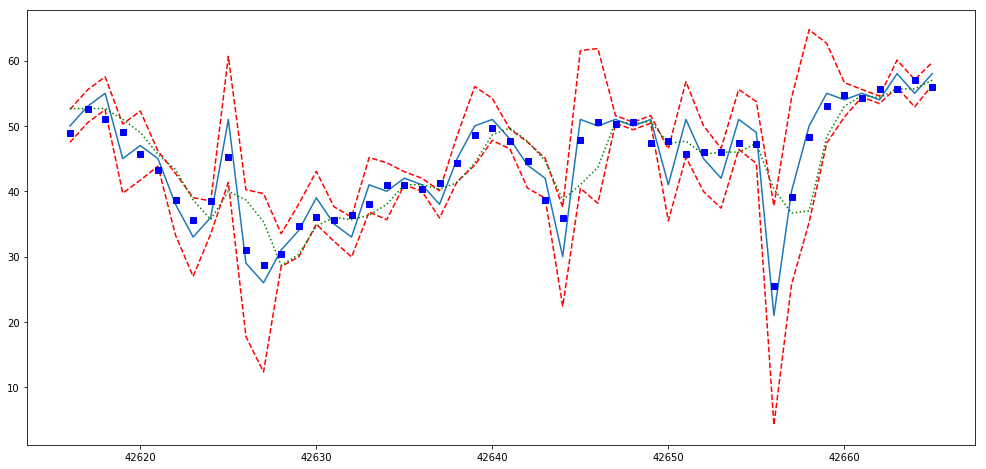

In [58]:
plt.figure(figsize=(17,8))
plt.plot(df["Mannerheimintie"][:50])
plt.plot(df["Mannerheimintie"][:50] + df["Rolling-std"][:50], "--", color='red')
plt.plot(df["Mannerheimintie"][:50] - df["Rolling-std"][:50], "--", color='red')
plt.plot(df["Rolling-mean"][:50], ":", color="green")
plt.plot(df["Signal"][:50], "bs")

plt.show()

In [59]:
df.dtypes

Timestamp                   datetime64[ns]
Mannerheimintie                    float64
Air pressure (msl) (hPa)           float64
Relative humidity (%)              float64
Rain intensity (mm/h)              float64
Air temperature (degC)             float64
Wind direction (deg)               float64
Wind speed (m/s)                   float64
Rolling-mean                       float64
Rolling-std                        float64
Signal                             float64
dtype: object

In [61]:
dlen = int(len(df) * 0.9)
training = df[:dlen]
evaluation = df[dlen:]

In [63]:
#full data
df.to_parquet("data/air-quality-idx-2.parquet.gzip", compression="gzip")
#training
training.to_parquet("data/air-quality-idx-train-2.parquet.gzip", compression="gzip")
#evaluation
evaluation.to_parquet("data/air-quality-idx-eval-2.parquet.gzip", compression="gzip")

/Users/aapo/anaconda3/lib/python3.7/site-packages/pyarrow/pandas_compat.py:114: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  result = infer_dtype(pandas_collection)
